In [2]:
import os
from glob import glob
import pandas_profiling

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image
os.environ["KMP_DUPLICATE_LIB_OK"]="True"

In [9]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

# Model

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Preprocess

In [11]:
train_paths = glob('../data/dataset/mnist_png/training/*/*.png')
test_paths = glob('../data/dataset/mnist_png/testing/*/*.png')

len(train_paths), len(test_paths)

(60000, 10000)

참고: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class

In [12]:
class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):

        self.data_paths = data_paths
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path).convert("L")
        label = int(path.split('\\')[-2])
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [13]:
torch.manual_seed(seed)

use_cuda = not no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

## Understand Better

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
path = 'puppy.jpg'

In [13]:
image = Image.open(path)

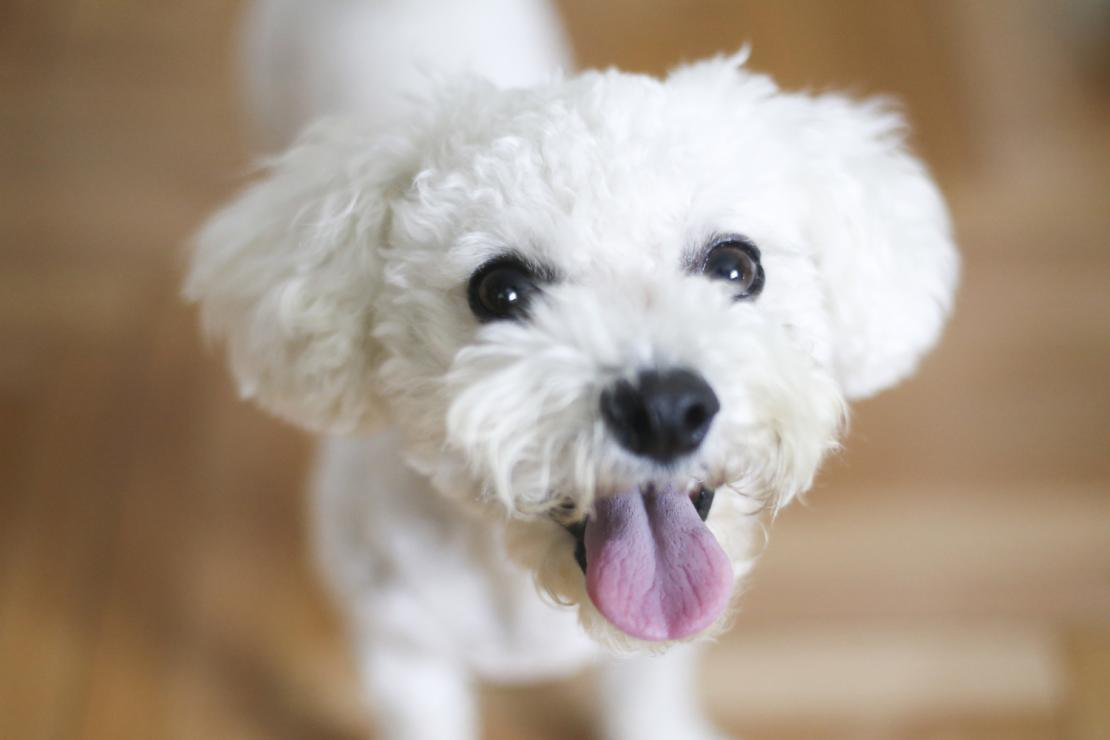

In [14]:
image

In [15]:
import torchvision

In [16]:
np.array(image).shape

(740, 1110, 3)

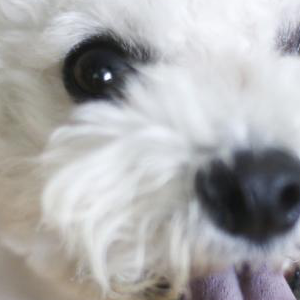

In [18]:
torchvision.transforms.CenterCrop(size = (300, 300))(image)

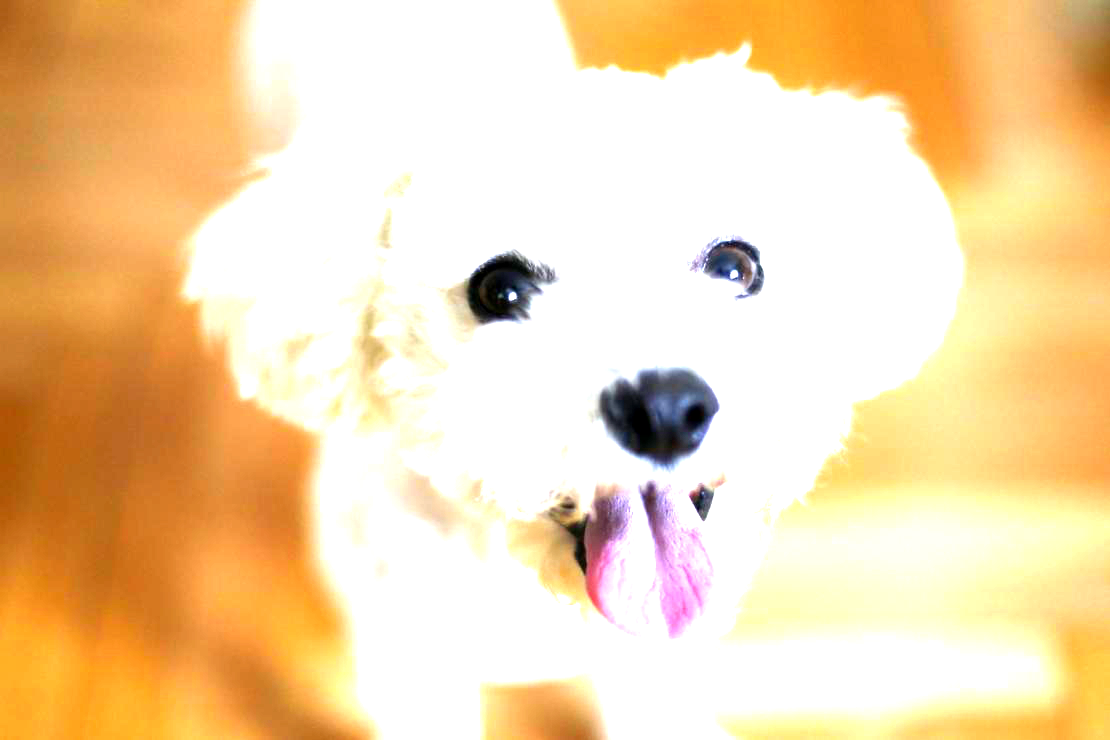

In [27]:
# brightness 0 ~ 지정숫자 랜덤하게 바꾼다
torchvision.transforms.ColorJitter(brightness=1, contrast=0.5, saturation=1, hue = 0)(image)

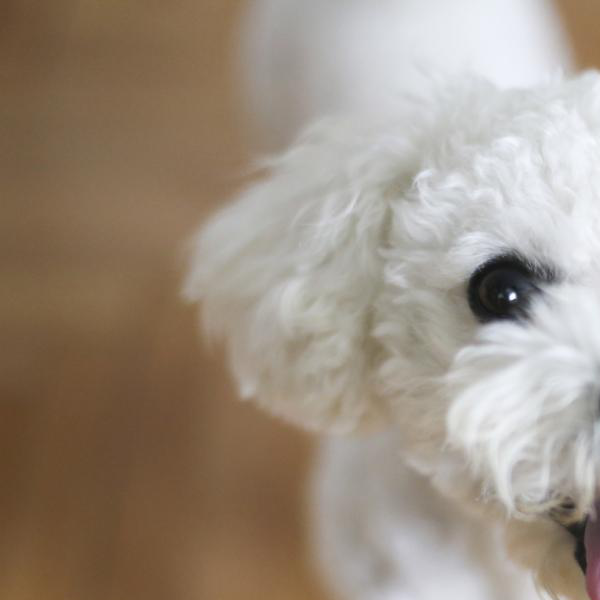

In [36]:
torchvision.transforms.FiveCrop(size = (600, 600))(image)[0]

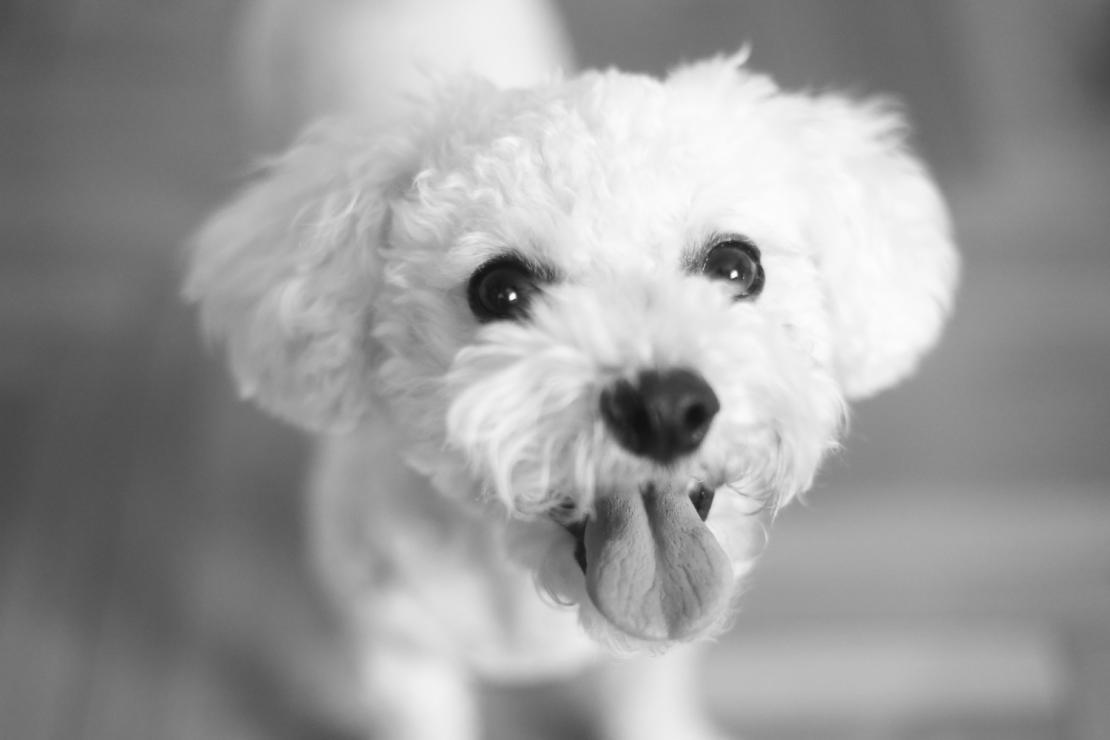

In [37]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

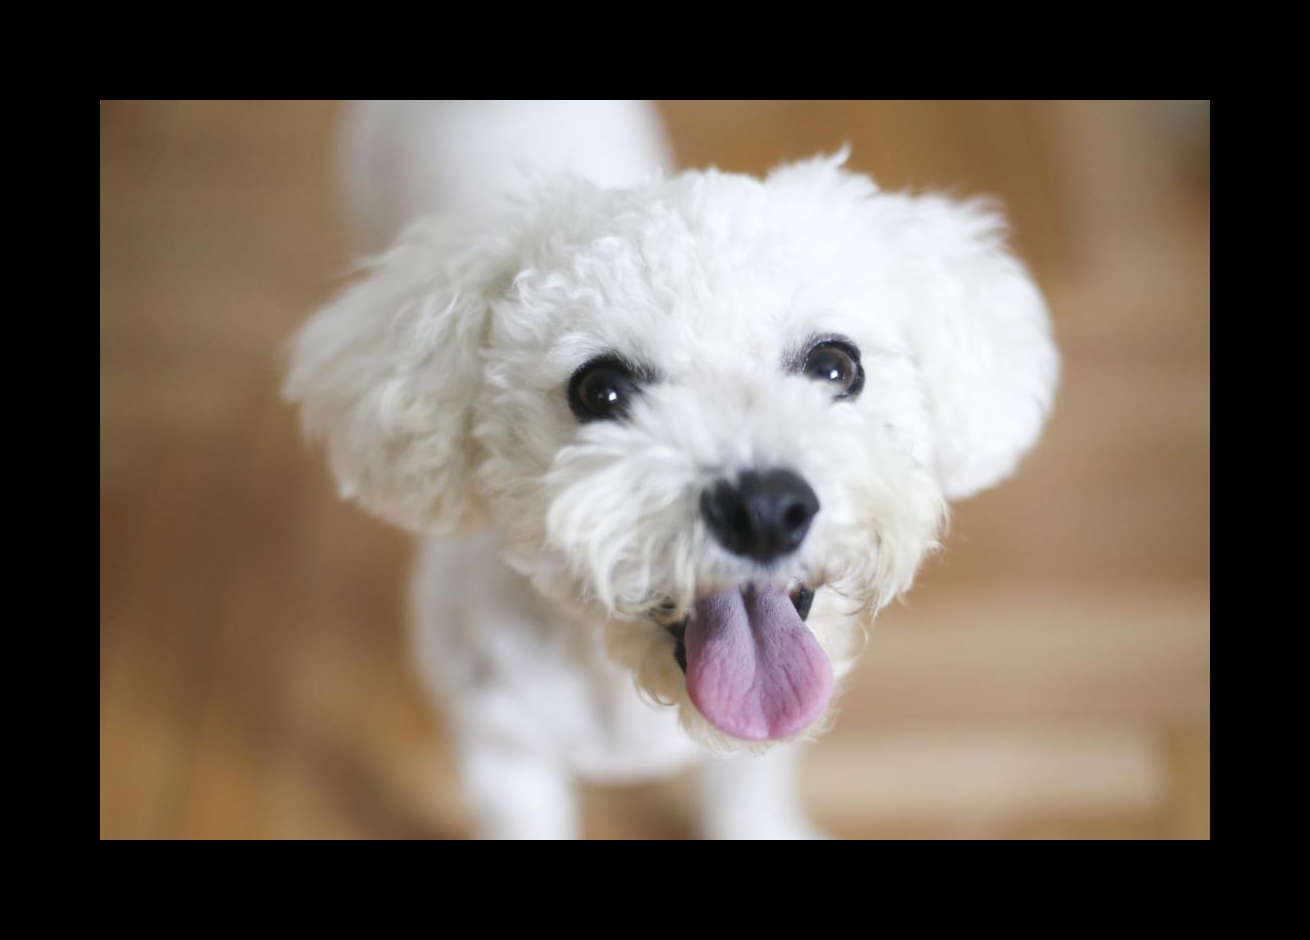

In [40]:
torchvision.transforms.Pad(padding=(100, 100), fill=0, padding_mode="constant")(image)

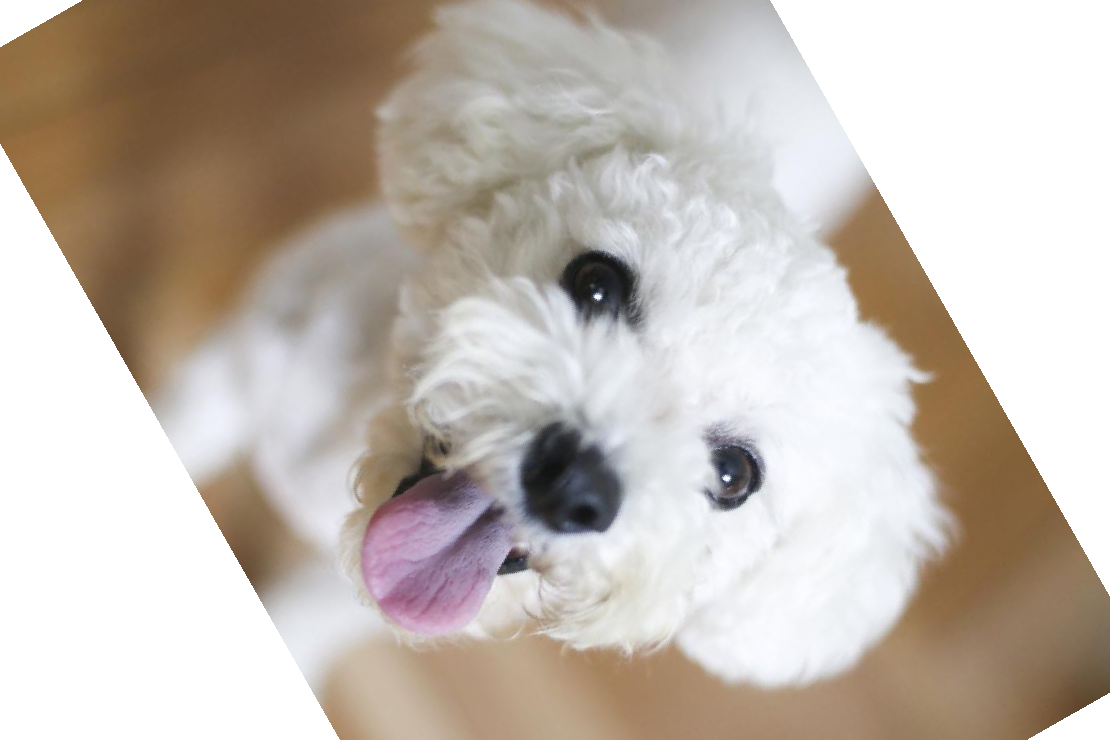

In [43]:
torchvision.transforms.RandomAffine(degrees=90, fillcolor = (255, 255, 255))(image)

In [67]:
transforms = [torchvision.transforms.Grayscale(num_output_channels=1),
             torchvision.transforms.CenterCrop(size = (300, 300)),
             torchvision.transforms.RandomAffine(degrees=90, fillcolor = 0)]

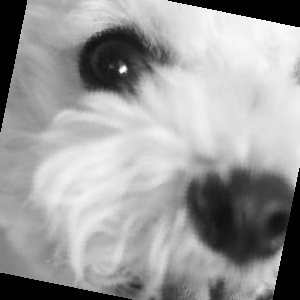

In [72]:
torchvision.transforms.RandomApply(transforms, p=0.8)(image)

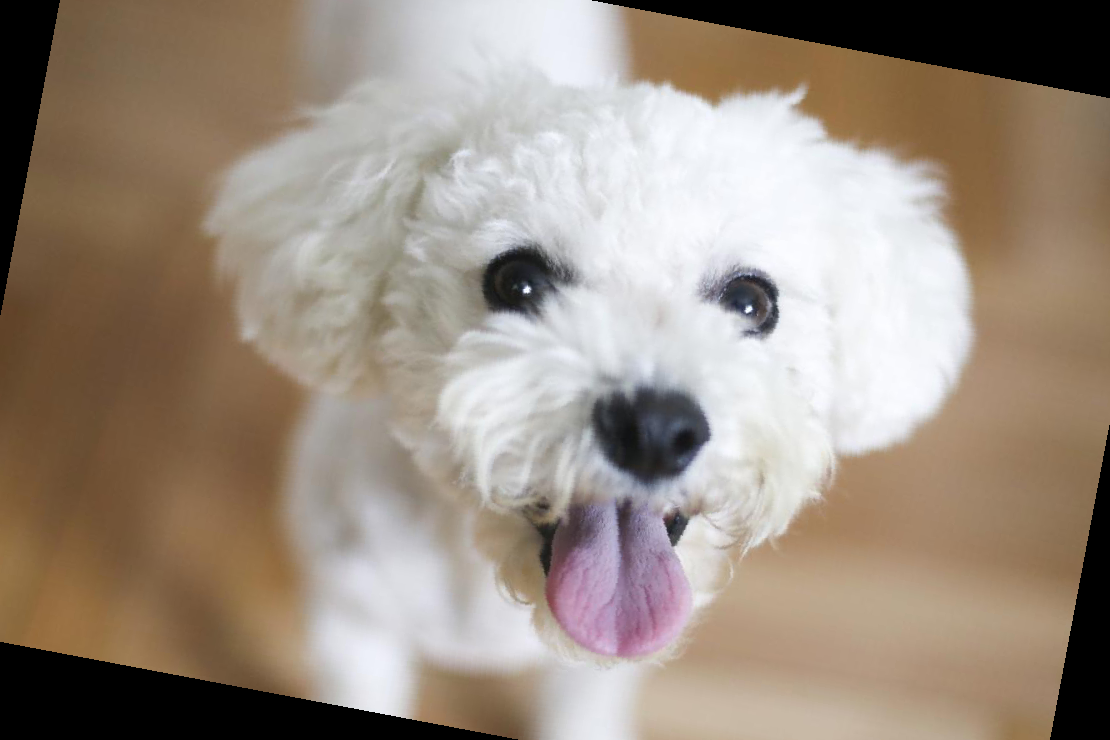

In [73]:
torchvision.transforms.RandomChoice(transforms)(image)

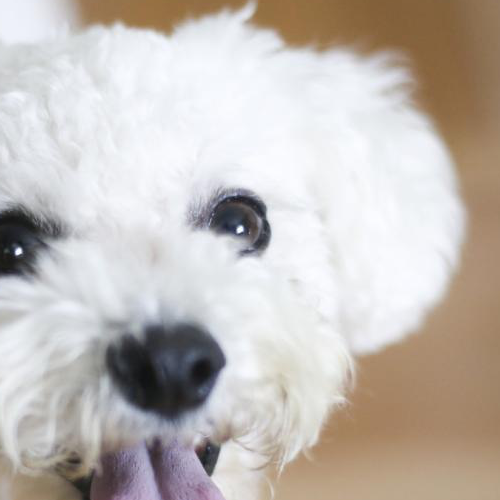

In [77]:
torchvision.transforms.RandomCrop(size = (500, 500))(image)

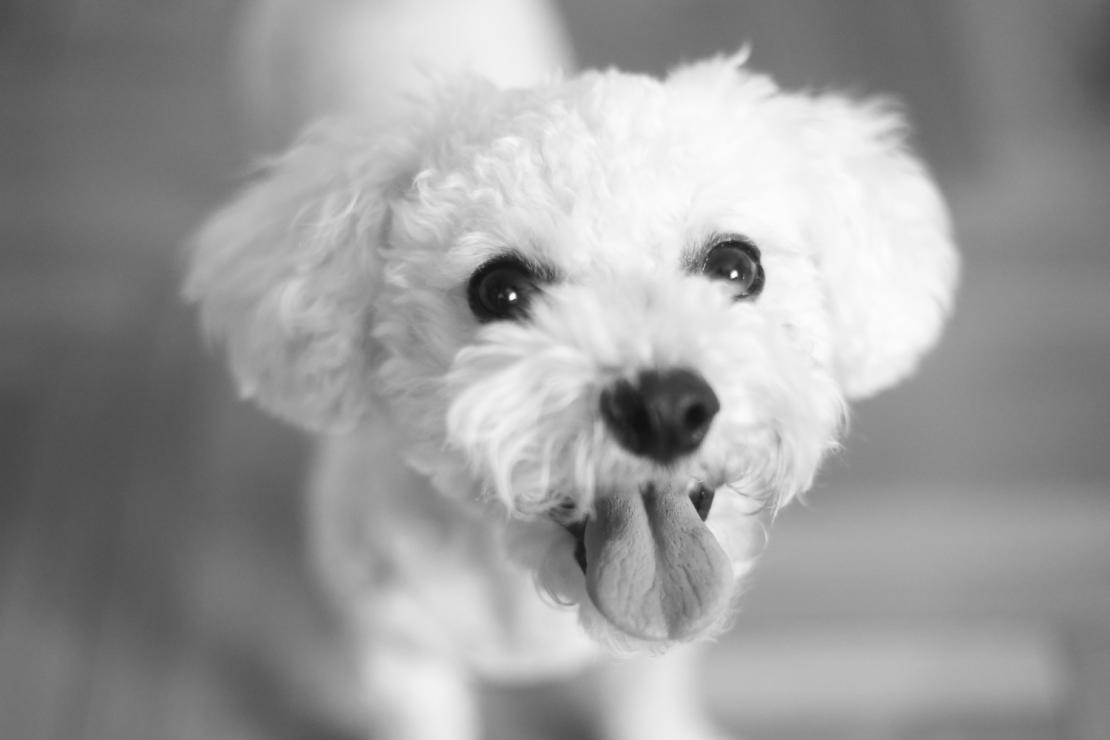

In [78]:
torchvision.transforms.RandomGrayscale(p = 0.8)(image)

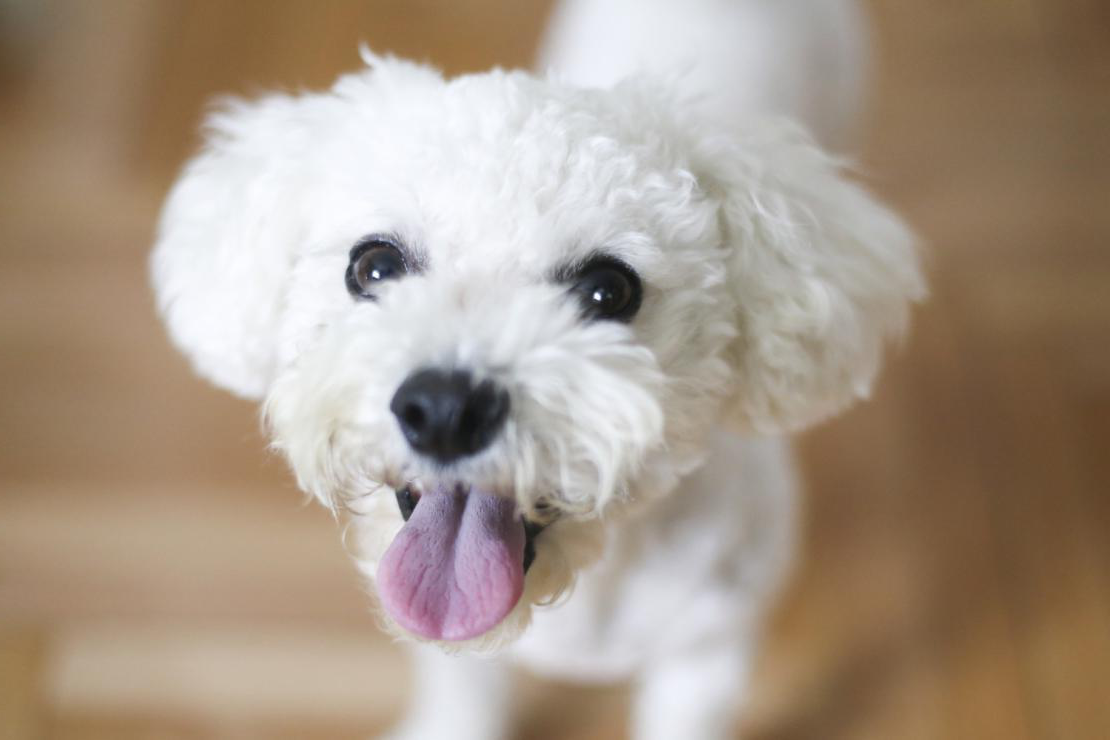

In [88]:
torchvision.transforms.RandomHorizontalFlip(p = 0.8)(image)

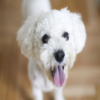

In [96]:
torchvision.transforms.Resize((100, 100))(image)

# Transform on Tensor

In [98]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [99]:
tensor = torchvision.transforms.ToTensor()(image)

In [100]:
trans = torchvision.transforms.Normalize(mean = (0,0,0), std=(1, 1, 1))(tensor)

In [104]:
np.min(image), np.max(image)

(12, 255)

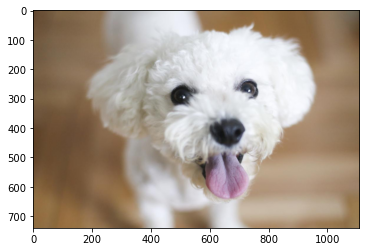

In [103]:
plt.imshow(trans.numpy().transpose(1, 2, 0))

In [105]:
np.min(trans.numpy()), np.max(trans.numpy())

(0.047058824, 1.0)

In [121]:
trans = torchvision.transforms.RandomErasing(p = 0.5, scale=(0.02, 0.33), ratio = (0.3, 3.3), value = 0)(tensor)

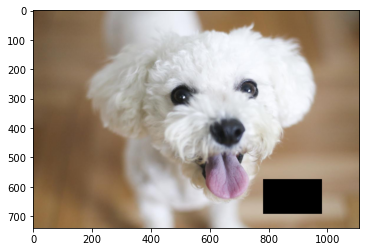

In [122]:
plt.imshow(trans.numpy().transpose(1,2,0))